# Task 1 - State Vector simulation of quantum circuits

### by Musfar Muhamed Kozhikkal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## 1) Naive simulation using matrix multiplication

Quantum state vector also known as qubits can be represented as matries:

$$ |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, $$

$$ |1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}. $$

A quantum circuit is the mainpulation of these qubits using quantum gates to perform a desried computation. The operation by quantum gates on the qubits are carried out by applying matrix multiplication to the state vector. Most of the basic gates like $I$ (Identity Gate), $X$ (NOT Gate) and $H$ (Hadamard Gate) acts on a single qubit while gate like $CNOT$ acts on the multiple qubits.

- **Identity Gate**:
$$ I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} $$
- **Pauli-X** (NOT Gate):
$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} $$ 
- **Hadamard Gate**:
$$ H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

- **CNOT Gate (2-qubit gate):** 
$$ \text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} $$

**Problem:** 
- Define a quantum circuit consisting of these gates and apply the gates sequentially to the state vector via matrix multiplication. 
- Plot the runtime of your code as a function of the number of qubits. How many qubits can you simulate this way? 


In [2]:
def ground(num_qubits):
    return np.array([1] + [0] * (2**num_qubits - 1))

def X():
    return np.array([[0, 1], 
                     [1, 0]])

def H():
    return np.array([[1, 1], 
                     [1, -1]]) / np.sqrt(2)

def CNOT():
    return np.array([[1, 0, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 0, 1],
                     [0, 0, 1, 0]])

def Gate(state, gate, num_qubits, target, control=None):
    if control is None:
        n_gate = np.eye(1)
        for i in range(num_qubits):
            if i == target:
                n_gate = np.kron(n_gate, gate)
            else:
                n_gate = np.kron(n_gate, np.eye(2))
    else:
        n_gate = CNOT()
        for i in range(num_qubits - 2):
            n_gate = np.kron(n_gate, np.eye(2))
    
    return np.dot(n_gate, state)


def circuit(num_qubits):
    state = ground(num_qubits)
    
    # Apply H gate to first qubit
    state = Gate(state, H(), num_qubits, 0)
    
    # Apply CNOT gate with control on first qubit and target on second qubit
    state = Gate(state, CNOT(), num_qubits, 1, control=0)
    
    # Apply X gate to last qubit
    state = Gate(state, X(), num_qubits, num_qubits - 1)
    
    return state


[0.0006678104400634766, 0.00023555755615234375, 0.0002377033233642578, 0.0003085136413574219, 0.0004591941833496094, 0.0010678768157958984, 0.0027420520782470703, 0.010088682174682617, 0.17202520370483398, 0.5309669971466064, 0.9487454891204834, 2.635910749435425]


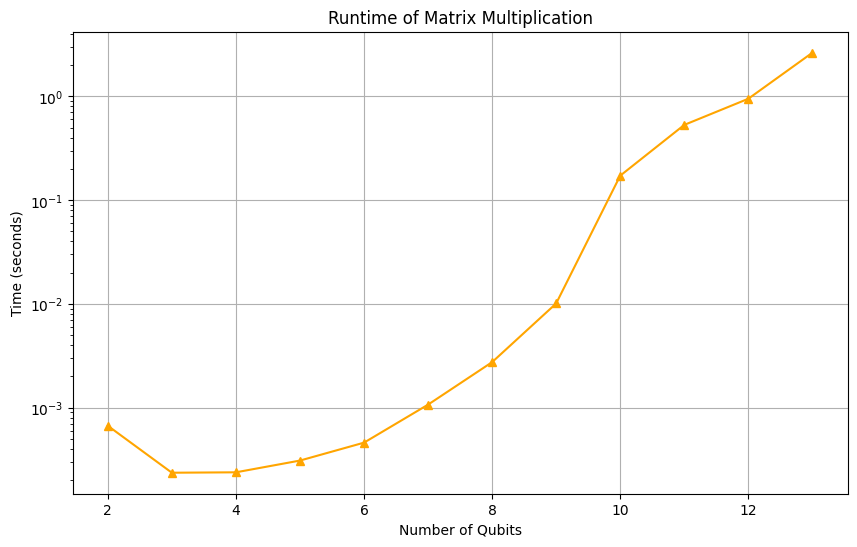

In [3]:
max_qubits = 13
times = []
qubit_range = range(2, max_qubits + 1)

for n in qubit_range:
    start_time = time.time()
    circuit(n)
    end_time = time.time()
    times.append(end_time - start_time)

print(times)
plt.figure(figsize=(10, 6))
plt.plot(qubit_range, times, marker='^', color='orange')
plt.title("Runtime of Matrix Multiplication")
plt.xlabel("Number of Qubits")
plt.ylabel("Time (seconds)")
plt.yscale('log')
plt.grid(True)
plt.show()



- **Runtime**: The runtime increases exponentially with the number of qubits, as the state vector's size grows exponentially (i.e.,  $2^n$ ).
- **Simulation Limit**: You would have a state vector of size ( $2^{13} = 8192$ ) for 13 qubits. My laptop starting struggling to compute more than 13 qubits. 


### 2. Advanced Simulation using Tensor Multiplication

We can simulate the quantum circuit using tensor multiplication rather than matrix multiplication. This approach takes advantage of the fact that the state can be represented as a tensor, and quantum gates can be applied using tensor operations.

#### Tensor Representation:
- For n-qubit states, a tensor of shape (2, 2, $\dots$, 2) (with n dimensions) represents the state.
- Gates, particularly 1- and 2-qubit gates, can be applied to these tensors by contracting the tensor over specific dimensions.

**Problem:** 
- Define a quantum circuit consisting of the 1- and 2-qubit matrix representations of $X$, $H$, $CNOT$ (same as above) and apply them sequentially to the quantum state tensor via tensor multiplication.
- Plot the runtime of your code as a function of the number of qubits. How many qubits can you simulate this way? Compare your results to subtask 1).


[0.0010561943054199219, 0.0001316070556640625, 0.00019621849060058594, 0.00015020370483398438, 0.0004184246063232422, 0.0007846355438232422, 0.0002932548522949219, 0.0014986991882324219, 0.01252436637878418, 0.5948688983917236, 0.8770725727081299, 1.7399232387542725]


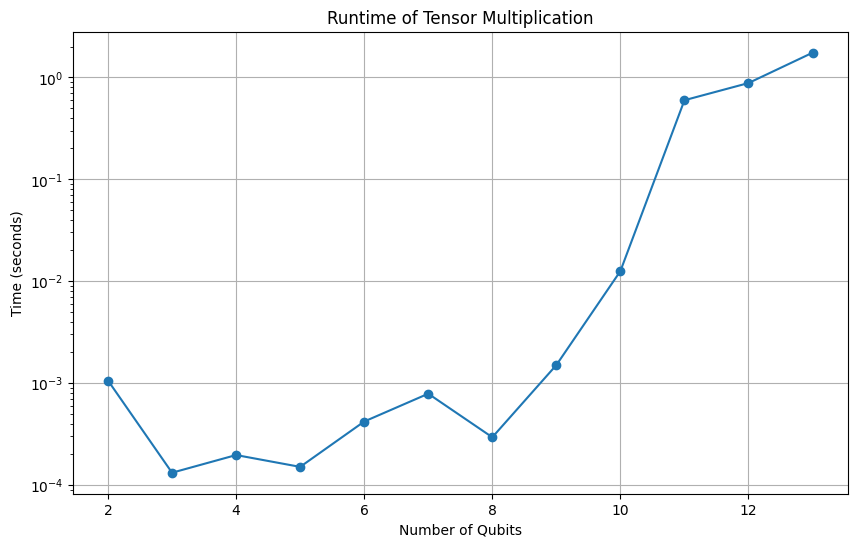

In [4]:
def ground_tensor(num_qubits):
    state = np.zeros((2,) * num_qubits)
    state[(0,) * num_qubits] = 1
    return state

def Gate_tensor(state, gate, num_qubits, target, control=None):
    if control is None:
        num_qubits = len(state.shape)
        gate_expanded = np.eye(2**num_qubits).reshape([2] * 2 * num_qubits)

        for i in range(2):
            for j in range(2):
                gate_expanded[(slice(None),) * target + (i,) + (slice(None),) * (num_qubits - target - 1) + (j,)] = gate[i, j]

        return np.tensordot(gate_expanded, state, axes=(list(range(num_qubits, 2*num_qubits)), list(range(num_qubits))))

    else:
        num_qubits = len(state.shape)
    
        if control > target:
            control, target = target, control
            gate = gate.reshape(2,2,2,2).transpose(2,3,0,1).reshape(4,4)

        gate_expanded = np.eye(2**num_qubits).reshape([2] * 2 * num_qubits)

        for i in range(2):
            for j in range(2):
                for k in range(2):
                    for l in range(2):
                        gate_expanded[(slice(None),) * control + (i,) + (slice(None),) * (target - control - 1) + (j,) + (slice(None),) * (num_qubits - target - 1) + (k,l)] = gate[i*2+j, k*2+l]

        return np.tensordot(gate_expanded, state, axes=(list(range(num_qubits, 2*num_qubits)), list(range(num_qubits))))
    

def circuit_tensor(num_qubits):
    state = ground_tensor(num_qubits)
    
    
    # Apply H gate to first qubit
    state = Gate_tensor(state, H(), num_qubits, 1)
    
    # Apply CNOT gate with control on first qubit and target on second qubit
    state = Gate_tensor(state, CNOT(), num_qubits, 1, control=0)

    # Apply X gate to last qubit
    state = Gate_tensor(state, X(), num_qubits, 1)
    
    return state


max_qubits = 13
times_tensor = []
qubit_range = range(2, max_qubits + 1)

for n in qubit_range:
    start_time = time.time()
    circuit_tensor(n)
    end_time = time.time()
    times_tensor.append(end_time - start_time)

print(times_tensor)
plt.figure(figsize=(10, 6))
plt.plot(qubit_range, times_tensor, marker='o')
plt.title("Runtime of Tensor Multiplication")
plt.xlabel("Number of Qubits")
plt.ylabel("Time (seconds)")
plt.yscale('log')
plt.grid(True)
plt.show()


- **Runtime**: The runtime scaling can still be exponential, but tensor multiplication improve the efficiency of certain operations compared to naive matrix multiplication. 
- **Simulation Limit**: You would have a state vector of size ( $2^{13} = 8192$ ) for 13 qubits. My laptop starting struggling to compute more than 13 qubits. 


comparing the runtime

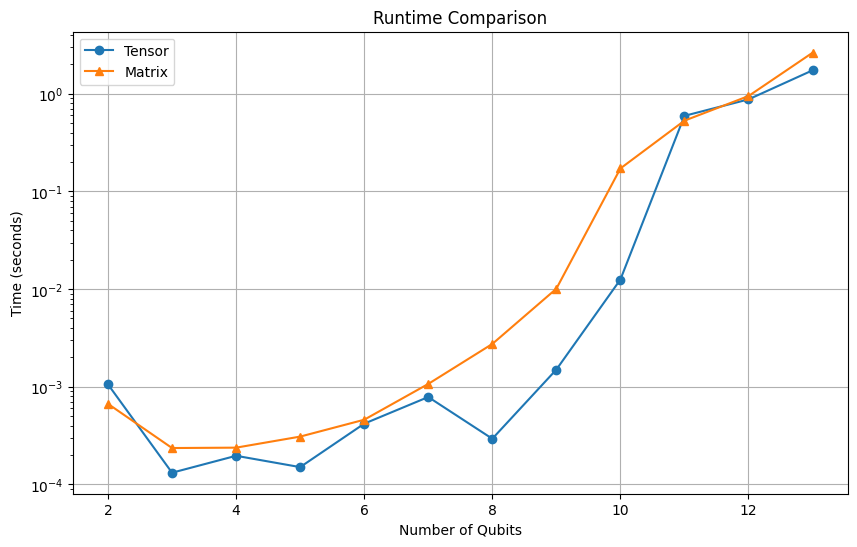

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(qubit_range, times_tensor, marker='o',label='Tensor')
plt.plot(qubit_range, times, marker='^',label='Matrix')
plt.title("Runtime Comparison")
plt.xlabel("Number of Qubits")
plt.ylabel("Time (seconds)")
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()


### 3. Bonus Question


**Problem:** 
- How would you sample from the final states in the statevector or tensor representations? 
- And how about computing exact expectation values in the form <Ψ| Op |Ψ>?




#### Sampling from the Final State:
To sample from the final quantum state $ |\Psi\rangle $, you can compute the probabilities of each state by taking the squared magnitudes of the amplitudes in the state vector. This allows you to probabilistically measure the quantum state.

- Measurement: If the state vector is $ |\Psi\rangle = [a_0, a_1, \dots, a_{2^n-1}] $, the probability of measuring $ |i\rangle $ is $ |a_i|^2 $.
- Sampling: To sample a state, choose a random number and select the corresponding state index based on these probabilities.



In [6]:
def sample(state):
    return np.random.choice(len(state), p=np.abs(state)**2/ np.sum(np.abs(state)**2))


print("Sampled state index:")
sample(np.array([0., 1., 0., 0.]))


Sampled state index:


1

#### Computing Expectation Values:

The expectation value of an operator $ \hat{O} $ for a quantum state $ |\Psi\rangle $ is given by the formula:

$$ \langle \Psi | \hat{O} | \Psi \rangle $$

Where $ \langle \Psi | $ is the conjugate transpose (or adjoint) of the state vector $ |\Psi\rangle $, $ \hat{O} $ is the operator acting on the quantum state, and the operator $ \hat{O} $ could be a single-qubit or multi-qubit operator, depending on the system.


In [7]:
def exp_value(state, operator):
    return np.real(np.conjugate(state) @ operator @ state)

  
def I():
    return np.array([[1, 0], 
                     [0, 1]])


print("Expectation value of X on |0>:", exp_value(ground(1), X()))
print("Expectation value of H on |0>:", exp_value(ground(1), H()))
print("Expectation value of I on |0>:", exp_value(ground(1), I()))

Expectation value of X on |0>: 0
Expectation value of H on |0>: 0.7071067811865475
Expectation value of I on |0>: 1


### Summary of Results:

1. **Matrix Maltiplication**:
   - **Runtime**: Exponential growth due to the size of the state vector (scales like $ 2^n $ for $ n $-qubits).
   - **Simulation limit**: Can handle up to around 13 qubits on my laptop before hitting memory or performance issues.

2. **Tensor Maltiplication**:
   - **Runtime**: Tensor simulation provides more natural handling of multi-qubit states, but it still suffers from exponential scaling, though tensor-based operations provide some computational advantages.
   - **Simulation limit**: Similar to matrix multiplication.

3. **Sampling and Expectation Values**:
   - **Sampling**: Probabilistic measurement from the quantum state can be simulated by calculating the squared magnitudes of the state vector.
   - **Expectation Values**: Can be computed by applying the operator and calculating the inner product with the state vector.
